In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
from scipy import signal
from scipy.fftpack import fft

import pandas as pd
import os

In [48]:
pwd
var = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/test.csv")
var.head() #check starting lines of dataset

'/Users/utkarshtripathi/Documents/PlatformIO/Projects'

In [28]:
# simulated EMG signal [emg1: with offset and emg2: without offset]
burst1 = np.random.uniform(-1, 1, size=500) + 0.08 # 800 samples between -1 and +1 Volts
burst2 = np.random.uniform(-1, 1, size=500) + 0.08
quiet = np.random.uniform(-0.05, 0.05, size=500) + 0.08

burst1x = np.random.uniform(-1, 1, size=500) # 800 samples between -1 and +1 Volts
burst2x = np.random.uniform(-1, 1, size=500)
quietx = np.random.uniform(-0.05, 0.05, size=500)

emg1 = np.concatenate([quiet, burst1, quiet, burst2, quiet])
emg2 = np.concatenate([quietx, burst1x, quietx, burst2x, quietx])

time = np.array([i/1000 for i in range(0, len(emg1), 1)]) # sampling rate 1000 Hz
# generate a **list** of integer values ranging from 0 to the length of the variable emg


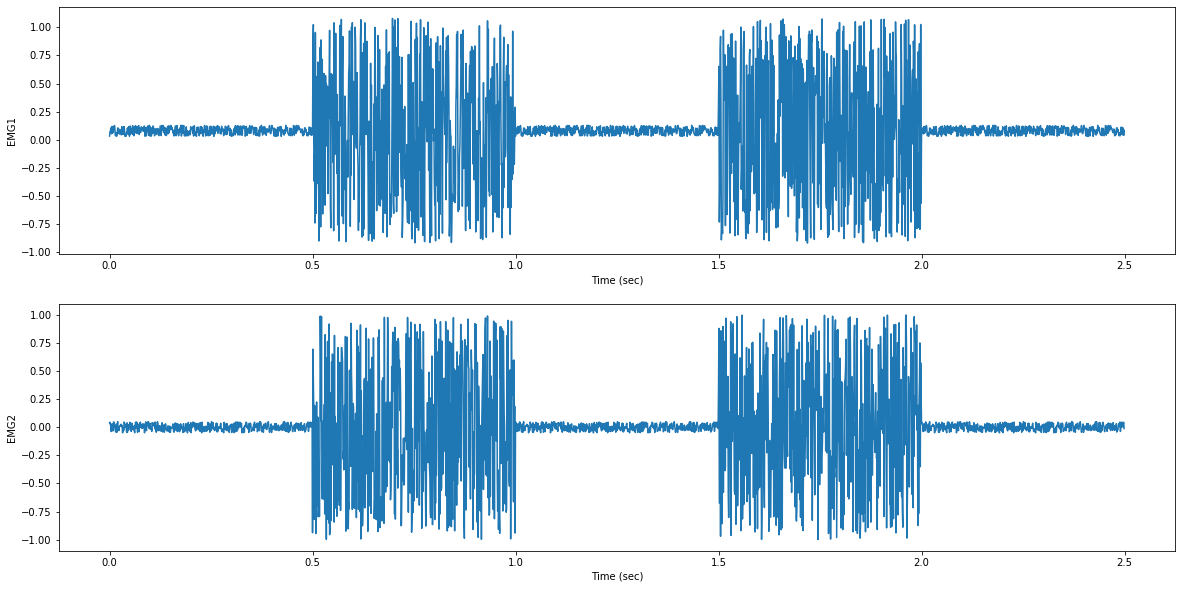

In [57]:
# plot EMG1 signal
fig = plt.figure()

plt.subplot(2,1,1)
plt.plot(time, emg1)
plt.xlabel('Time (sec)')
plt.ylabel('EMG1')

plt.subplot(2,1,2)
plt.plot(time, emg2)
plt.xlabel('Time (sec)')
plt.ylabel('EMG2')

fig.set_size_inches(w=20,h=10)
# fig.savefig('emg2.png')


In [58]:
# Baseline offset is not zero, solving:
# %whos # for checking variables
print ('Mean for first simulated emg signal' , np.mean(emg1))
print ('Mean for second simulated emg signal' , np.mean(emg2))

Mean for first simulated emg signal 0.07205534830163694
Mean for second simulated emg signal 0.0008538712847905309


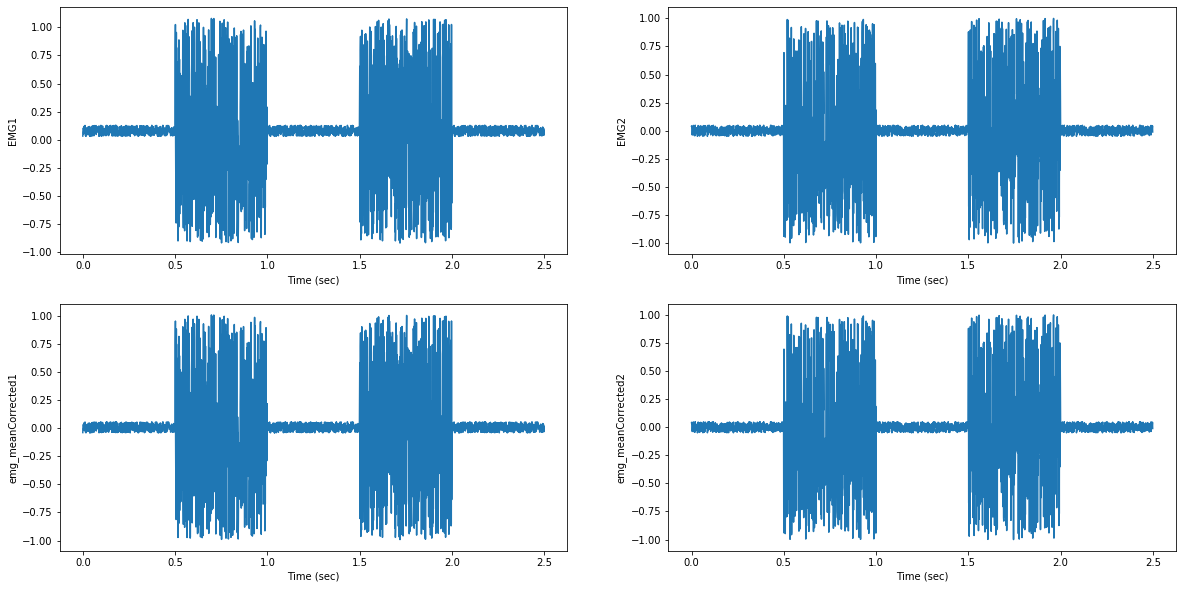

In [59]:
## Mean corrections [emg1: with offset and emg2: without offset]
emg_meanCorrected1 = emg1 - np.mean(emg1)
emg_meanCorrected2 = emg2 - np.mean(emg2)

# plot EMG1 signal
fig = plt.figure()

plt.subplot(2,2,1)
plt.plot(time, emg1)
plt.xlabel('Time (sec)')
plt.ylabel('EMG1')

plt.subplot(2,2,2)
plt.plot(time, emg2)
plt.xlabel('Time (sec)')
plt.ylabel('EMG2')

plt.subplot(2,2,3)
plt.plot(time, emg_meanCorrected1)
plt.xlabel('Time (sec)')
plt.ylabel('emg_meanCorrected1')

plt.subplot(2,2,4)
plt.plot(time, emg_meanCorrected2)
plt.xlabel('Time (sec)')
plt.ylabel('emg_meanCorrected2')

fig.set_size_inches(w=20,h=10)

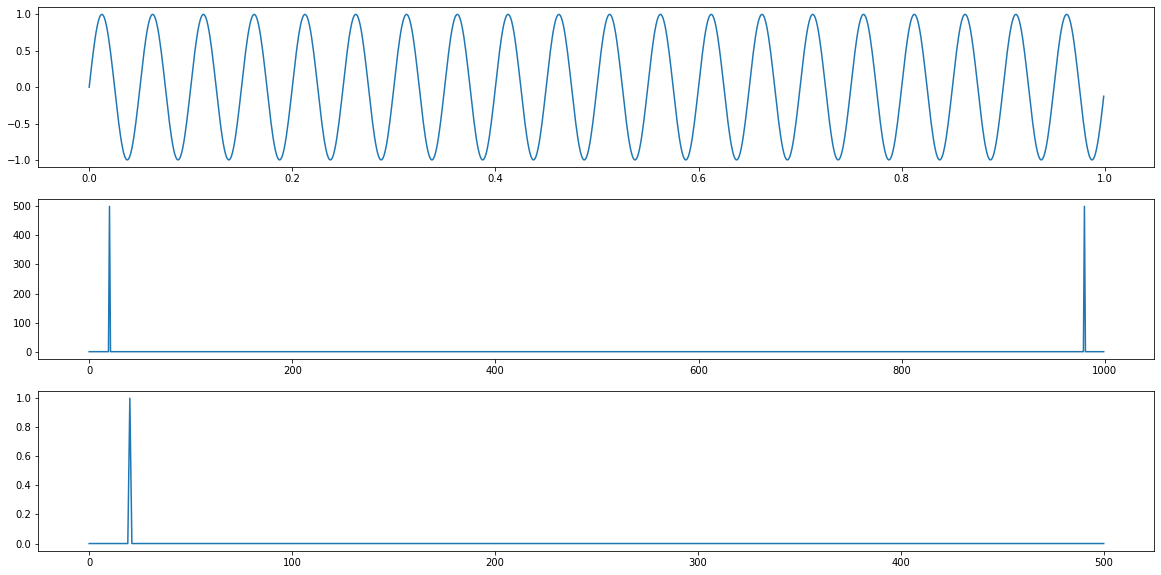

In [61]:
### Python fft testing with only sine wave to create the right fft

Fs = 1000 # Sampling frequency
sineFreq = 20
# t = np.linspace(0, 2, 100)
tx = np.arange(start=0, stop=1, step=1/Fs) # step == dt

# print(t)
# print(tx)

x = np.sin(2*np.pi*sineFreq * tx)
X = fft(x)

# Plot sine wave
fig = plt.figure()

plt.subplot(3,1,1)
plt.plot (tx,x)

# Plot abs(fft(x))
plt.subplot(3,1,2)
plt.plot (abs(X)) # incorrect plot

## Frequency axis creation
n = np.size(tx)
freq_axis = (Fs/2) * np.linspace (0,1,n/2) # frequency axis: 0->500 Hz and generate half spectrum
X_corrected = abs( X[0:np.size(freq_axis)] ) * (2/n)

plt.subplot(3,1,3)
plt.plot (freq_axis,X_corrected) # Correct plot
fig.set_size_inches(w=20,h=10)


[0.000e+00 1.000e-03 2.000e-03 ... 2.497e+00 2.498e+00 2.499e+00] 2500


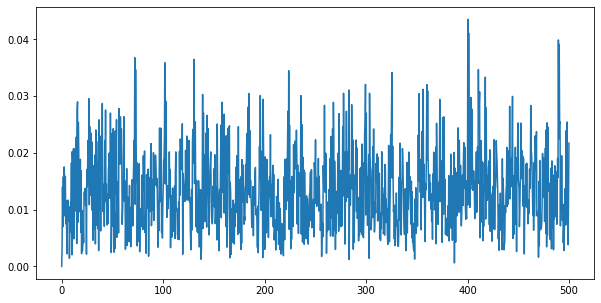

In [64]:
## Fourier transform on EMG signals. NOTE:
# emg1: with offset and emg2: without offset
# emg_meanCorrected1 emg_meanCorrected2
# FFT_emg_normalized => FT of emg_meanCorrected1

Fs_emg = 1000 # Sampling frequency (see first block)
print(time, np.size(time))

FFT_emg = fft(emg_meanCorrected1)

## Frequency axis creation
n_emg = np.size(time)
freq_axis_emg = (Fs/2) * np.linspace (0,1,n_emg/2) # frequency axis: 0->500 Hz and generate half spectrum
FFT_emg_normalized = abs( FFT_emg[0:np.size(freq_axis_emg)] ) * (2/n_emg)

fig = plt.figure()
plt.plot (freq_axis_emg,FFT_emg_normalized)
fig.set_size_inches(w=10,h=5)

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


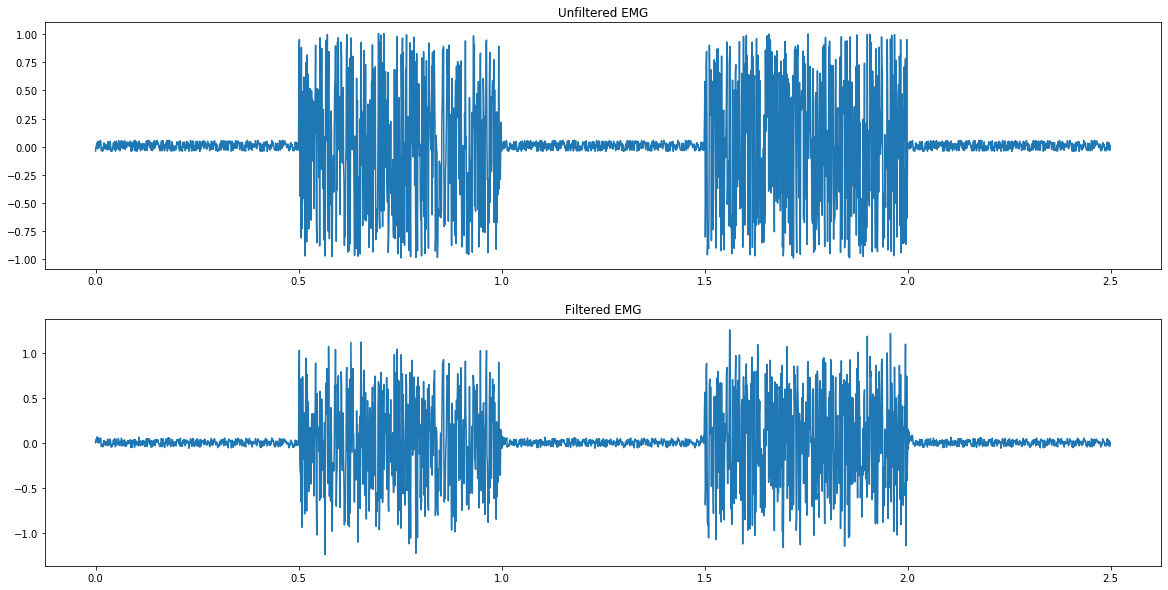

In [69]:
## BANDPASS FILTERING
## Comparison of ---FFT_emg_normalized--- and ---FFT_emg_filtered_normalized---

# Slow oscillations in the EMG signal -> movement artefacts 
# Fast oscillations -> unwanted electrical noise
# Add bandpass filter to avoid both (20-450 Hz) :

high = 20/(Fs/2)
low = 450/(Fs/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# Process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_meanCorrected1)

# "TIME DOMAIN" plot comparison of unfiltered and filtered EMG
fig = plt.figure()
fig.set_size_inches(w=11,h=7)

plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1).set_title('Unfiltered EMG')
plt.plot(time, emg_meanCorrected1)

plt.subplot(2, 1, 2)
plt.subplot(2, 1, 2).set_title('Filtered EMG')
plt.plot(time, emg_filtered)
fig.set_size_inches(w=20,h=10)



/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


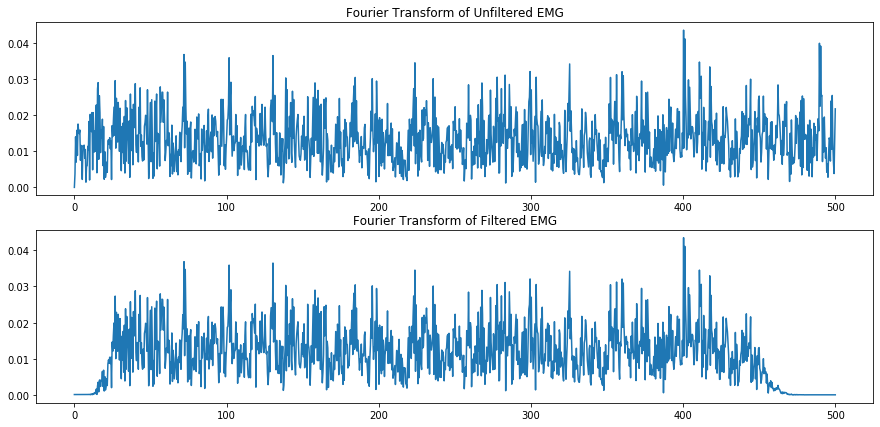

In [70]:
# FFT_emg_normalized => FT of emg_meanCorrected1
# FFT_emg_filtred_normalized => FT of emg_filtered

FFT_emg_filtered = fft(emg_filtered)
FFT_emg_filtered_normalized = abs( FFT_emg_filtered[0:np.size(freq_axis_emg)] ) * (2/n_emg)

# "FREQUENCY DOMAIN" plot comparison of unfiltered and filtered EMG
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1).set_title('Fourier Transform of Unfiltered EMG')
plt.plot(freq_axis_emg, FFT_emg_normalized)

plt.subplot(2, 1, 2)
plt.subplot(2, 1, 2).set_title('Fourier Transform of Filtered EMG')
plt.plot(freq_axis_emg, FFT_emg_filtered_normalized)

fig.set_size_inches(w=15,h=7)


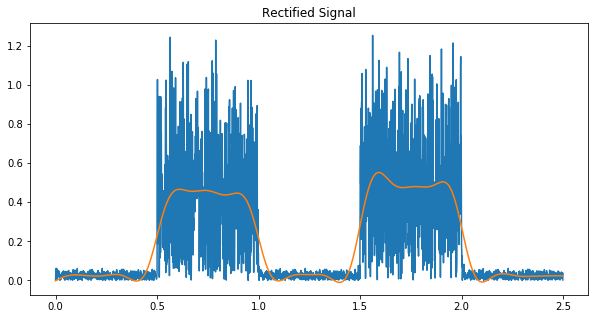

In [72]:
## Rectification of signal - take abs
RECT_emg_filtered = abs (emg_filtered)
fig = plt.figure()
fig.set_size_inches(w=10,h=5)
plt.title('Rectified Signal')
plt.plot(time, RECT_emg_filtered)

low_pass = 10
low_pass = low_pass/Fs
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
emg_envelope = sp.signal.filtfilt(b2, a2, RECT_emg_filtered)
plt.plot(time, emg_envelope)



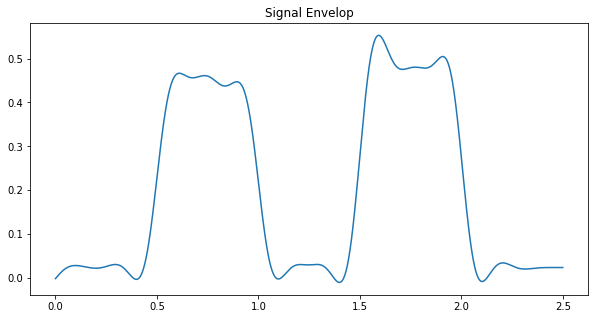

In [73]:
## EMG Envelop generation

# Use a low pass filter to capture the shape or “envelope” of the EMG signal -> 
# better reflects force generated by a muscle

low_pass = 10
low_pass = low_pass/Fs
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
emg_envelope = sp.signal.filtfilt(b2, a2, RECT_emg_filtered)
fig = plt.figure()
fig.set_size_inches(w=10,h=5)
plt.title('Signal Envelop')
plt.plot(time, emg_envelope)

